In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [3]:
df=pd.read_csv('/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv')

In [4]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
df.shape

(1504150, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [7]:
df.Year.unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

**Number of Casualities in each day of the week in descending order**

In [8]:
df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
df['Junction_Control'].fillna(value = 'None', inplace = True)
#df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
df['Latitude'].fillna(value = 0, inplace = True)

In [9]:
data={'Casualities_Count': df['Number_of_Casualties'],'day_of_Week': df['Day_of_Week'] }
accidents_per_week=pd.DataFrame(data)
accidents_per_week.groupby(by='day_of_Week').sum().sort_values(by='Casualities_Count',ascending=False)

,Casualities_Count
day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [10]:
accidents_per_week.sample(20)

,Casualities_Count,day_of_Week
11885,1,6
1060927,1,7
1008840,1,3
1040475,2,3
402287,1,3
1448076,1,7
752492,1,5
1320082,1,5
616689,1,7
1082062,1,4


Text(0.5, 0, '1 - Sunday ,  2 - Monday  ,3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday')

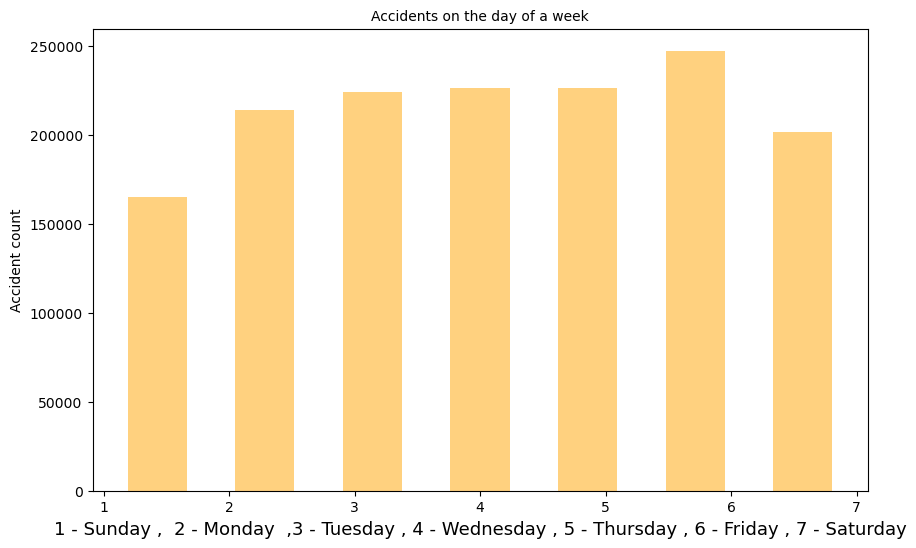

In [11]:
plt.figure(figsize=(10,6))
accidents_per_week.day_of_Week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 10)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 10)
plt.xlabel('1 - Sunday ,  2 - Monday  ,3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday' , fontsize = 13)

**Speed limit on the roads where accidents took place**

In [12]:
accidents_per_week['Speed_Limit']=df.Speed_limit

In [13]:
accidents_per_week.sample(4)

,Casualities_Count,day_of_Week,Speed_Limit
915568,1,4,60
275434,1,6,30
438151,1,4,30
1440531,1,6,30


In [14]:
accident_severity_data={'Light_Conditions':df.Light_Conditions,
                       'Weather_Conditions':df.Weather_Conditions,
                       'Accident_Severity':df.Accident_Severity}
accident_severity_df=pd.DataFrame(accident_severity_data)
accident_severity_df.head(10)

,Light_Conditions,Weather_Conditions,Accident_Severity
0,Daylight: Street light present,Raining without high winds,2
1,Darkness: Street lights present and lit,Fine without high winds,3
2,Darkness: Street lights present and lit,Fine without high winds,3
3,Daylight: Street light present,Fine without high winds,3
4,Darkness: Street lighting unknown,Fine without high winds,3
5,Daylight: Street light present,Raining without high winds,3
6,Darkness: Street lights present and lit,Fine without high winds,3
7,Daylight: Street light present,Fine without high winds,3
8,Darkness: Street lights present and lit,Fine without high winds,3
9,Daylight: Street light present,Fine without high winds,3


In [15]:
accident_severity_df.describe()

,Accident_Severity
count,1.504150e+06
mean,2.838190e+00
std,4.018423e-01
min,1.000000e+00
25%,3.000000e+00
50%,3.000000e+00
75%,3.000000e+00
max,3.000000e+00


In [16]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 34.4+ MB


**Convert object datatype into category datatype**

In [17]:
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes=='object'].index:
    accident_severity_df[object_feature]=accident_severity_df[object_feature].astype('category')

In [18]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 14.3 MB


**One hot encoding the categorical columns**

**Step missing**

In [19]:
accident_severity_df.head(5)

,Light_Conditions,Weather_Conditions,Accident_Severity
0,Daylight: Street light present,Raining without high winds,2
1,Darkness: Street lights present and lit,Fine without high winds,3
2,Darkness: Street lights present and lit,Fine without high winds,3
3,Daylight: Street light present,Fine without high winds,3
4,Darkness: Street lighting unknown,Fine without high winds,3


In [20]:
accident_severity=accident_severity_df.corr().loc['Accident_Severity':]
accident_severity=pd.DataFrame(accident_severity)

In [21]:
accident_severity

,Accident_Severity
Accident_Severity,1.0


<AxesSubplot:>

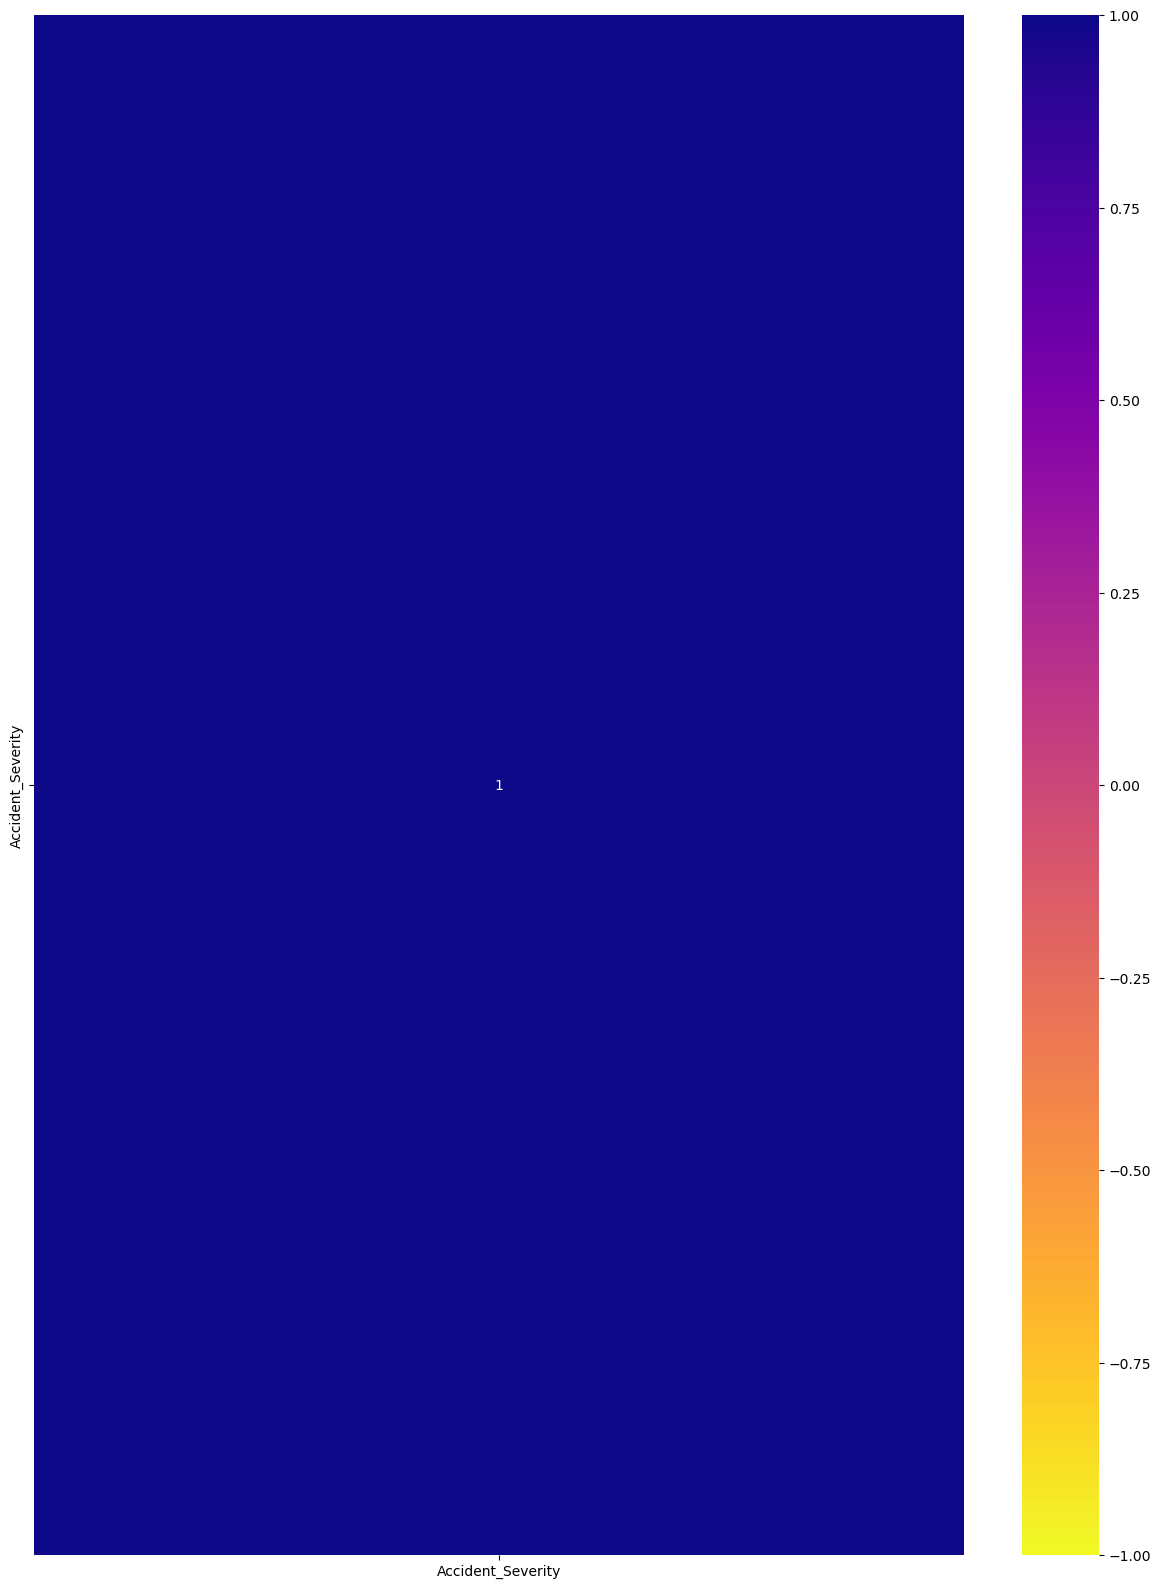

In [22]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity,vmin=-1,cmap='plasma_r',annot=True)

In [23]:
accident_severity_df=df.copy()

In [24]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [25]:

accident_severity_df['Light_Conditions'].value_counts()




Daylight: Street light present               1102222
Darkness: Street lights present and lit       296340
Darkeness: No street lighting                  82559
Darkness: Street lighting unknown              16120
Darkness: Street lights present but unlit       6909
Name: Light_Conditions, dtype: int64

In [26]:
accident_severity_df['Junction_Control'].value_counts()


Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

In [27]:
accident_severity_df['Special_Conditions_at_Site'].value_counts()

None                                               1467568
Roadworks                                            17223
Ol or diesel                                          5243
Mud                                                   4610
Road surface defective                                3664
Auto traffic singal out                               2788
Permanent sign or marking defective or obscured       2269
Auto traffic signal partly defective                   785
Name: Special_Conditions_at_Site, dtype: int64

In [28]:
accident_severity_df['Carriageway_Hazards'].value_counts()

None                                       1476900
Other object in carriageway                  11762
Any animal (except a ridden horse)            8014
Pedestrian in carriageway (not injured)       3586
Involvement with previous accident            2282
Dislodged vehicle load in carriageway         1606
Name: Carriageway_Hazards, dtype: int64

In [29]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts()


None within 50 metres                 1495269
Control by other authorised person       5220
Control by school crossing patrol        3644
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [30]:
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          1252571
Pedestrian phase at traffic signal junction     100248
non-junction pedestrian crossing                 79231
Zebra crossing                                   40106
Central refuge                                   27660
Footbridge or subway                              4300
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

**Drop columns**

In [31]:
drop_cols=['Carriageway_Hazards','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Special_Conditions_at_Site','Junction_Control']

<AxesSubplot:xlabel='Road_Type', ylabel='Accident_Severity'>

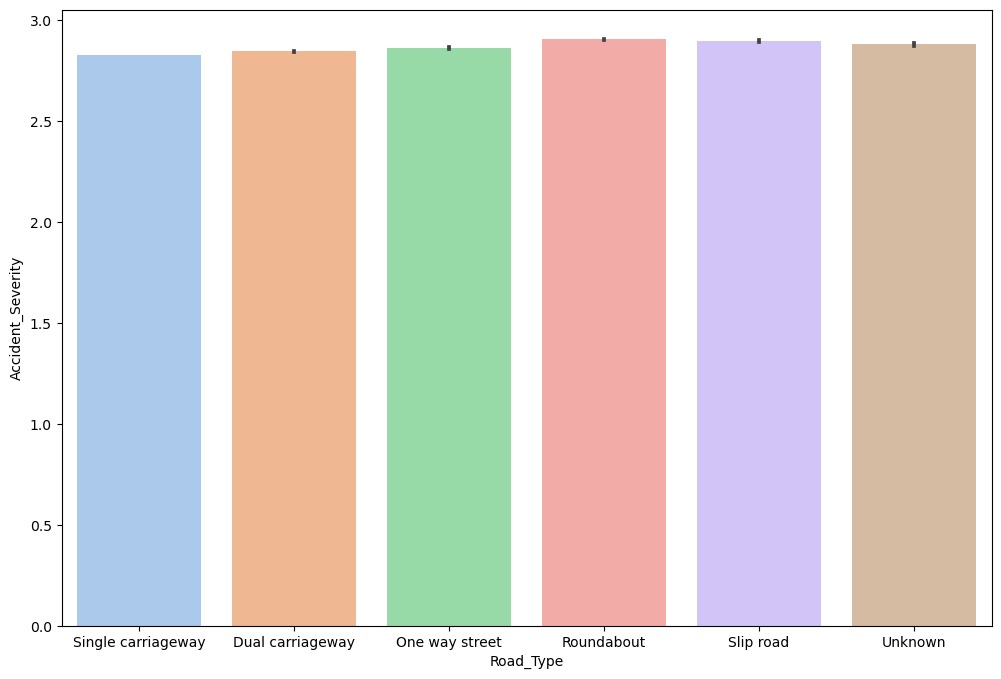

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='Road_Type',y='Accident_Severity',data=accident_severity_df,palette='pastel')

In [33]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes=='object'].index:accident_severity_df.drop(columns=feature,inplace=True)

In [34]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [35]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [36]:
new_matrix=accident_severity_df.corr()

In [37]:
new_matrix

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Unnamed: 0,1.000000,-0.099098,-0.018978,-0.101058,-0.018249,0.333496,-0.011277,0.003448,0.005047,-0.001842,0.340397,0.017955,0.006321,0.081329,-0.042901,-0.003913,0.099965,0.102025
Location_Easting_OSGR,-0.099098,1.000000,-0.420212,0.999359,-0.422123,-0.356474,0.013465,0.017152,-0.040780,-0.001883,-0.380452,-0.060289,-0.084678,-0.063709,0.044525,-0.000128,-0.095941,0.038404
Location_Northing_OSGR,-0.018978,-0.420212,1.000000,-0.430722,0.962771,0.167844,-0.031392,-0.041357,0.032092,0.003848,0.121125,0.035438,0.043899,0.047655,-0.030743,0.017022,0.053073,-0.013490
Longitude,-0.101058,0.999359,-0.430722,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.018249,-0.422123,0.962771,-0.432531,1.000000,0.156826,-0.030076,-0.039285,0.030983,0.003523,0.112444,0.033848,0.043064,0.044220,-0.028189,0.017234,0.042961,-0.010155
Police_Force,0.333496,-0.356474,0.167844,-0.369755,0.156826,1.000000,-0.031712,-0.015491,0.007073,0.000428,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,-0.011277,0.013465,-0.031392,0.013946,-0.030076,-0.031712,1.000000,0.075976,-0.083544,0.002961,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.003448,0.017152,-0.041357,0.018442,-0.039285,-0.015491,0.075976,1.000000,0.237349,-0.000116,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,0.005047,-0.040780,0.032092,-0.039501,0.030983,0.007073,-0.083544,0.237349,1.000000,-0.001455,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Day_of_Week,-0.001842,-0.001883,0.003848,-0.001894,0.003523,0.000428,0.002961,-0.000116,-0.001455,1.000000,0.000325,0.006843,0.002344,-0.015944,0.007822,0.000385,-0.016571,-0.003669


<AxesSubplot:>

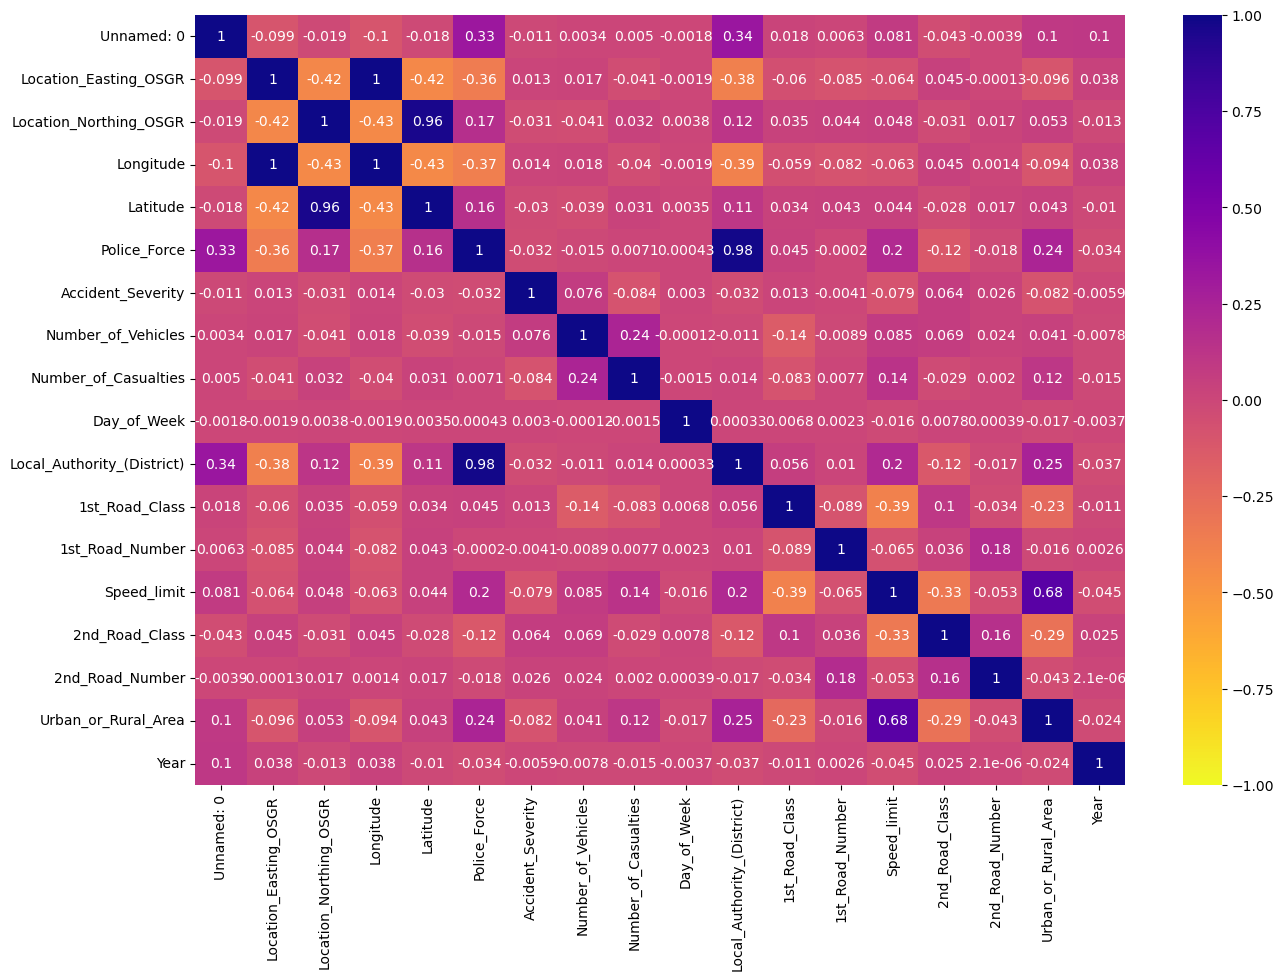

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(new_matrix,annot=True, vmin=-1,cmap='plasma_r')

<AxesSubplot:>

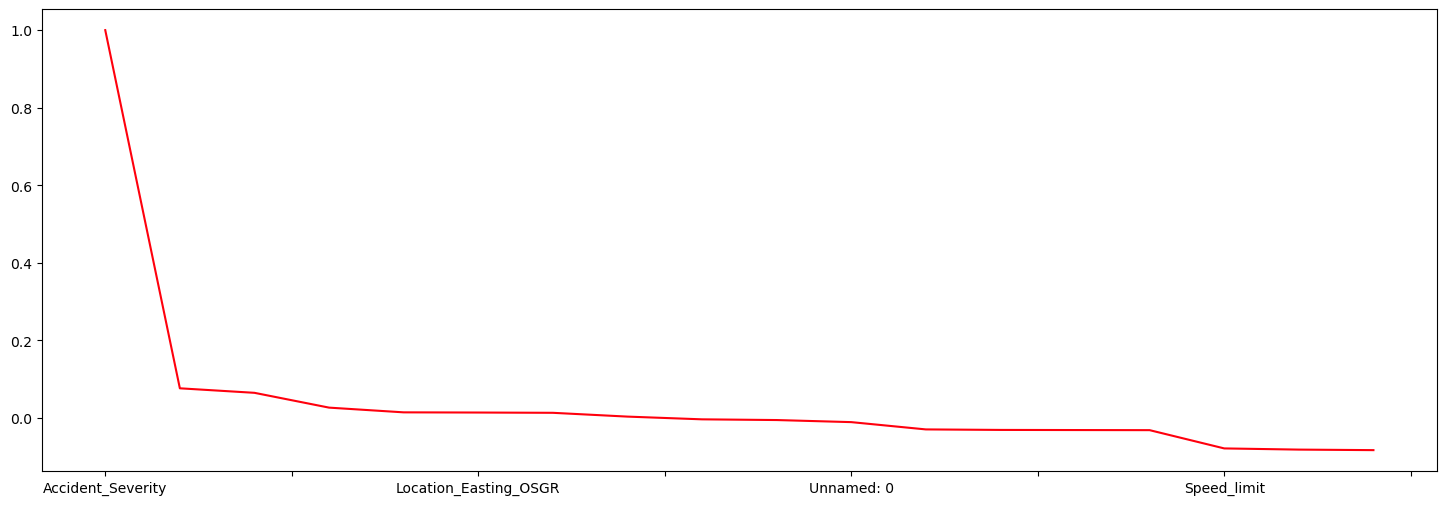

In [39]:
plt.figure(figsize=(18,6))
new_matrix['Accident_Severity'].sort_values(ascending=False).plot(color='#ff000d')

In [40]:
final_accident_severity_df=accident_severity_df.copy()
final_accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1504150 non-null  int64  
 1   Location_Easting_OSGR       1504049 non-null  float64
 2   Location_Northing_OSGR      1504150 non-null  float64
 3   Longitude                   1504049 non-null  float64
 4   Latitude                    1504150 non-null  float64
 5   Police_Force                1504150 non-null  int64  
 6   Accident_Severity           1504150 non-null  int64  
 7   Number_of_Vehicles          1504150 non-null  int64  
 8   Number_of_Casualties        1504150 non-null  int64  
 9   Day_of_Week                 1504150 non-null  int64  
 10  Local_Authority_(District)  1504150 non-null  int64  
 11  1st_Road_Class              1504150 non-null  int64  
 12  1st_Road_Number             1504150 non-null  int64  
 1

In [41]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes!='object'].index:
    if(new_matrix['Accident_Severity'][feature]<0.02 and new_matrix['Accident_Severity'][feature]>-0.02):
        final_accident_severity_df.drop(columns=feature,inplace=True)

In [42]:
final_accident_severity_df.head(5)

,Location_Northing_OSGR,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
0,178240.0,51.489096,1,2,1,1,12,30,-1,0,1
1,181650.0,51.520075,1,3,1,1,12,30,5,0,1
2,182240.0,51.525301,1,3,2,1,12,30,-1,0,1
3,177530.0,51.482442,1,3,1,1,12,30,-1,0,1
4,179040.0,51.495752,1,3,1,1,12,30,-1,0,1
